In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn import datasets

1. Постройте последний график методических указаний в исходном пространстве признаков.

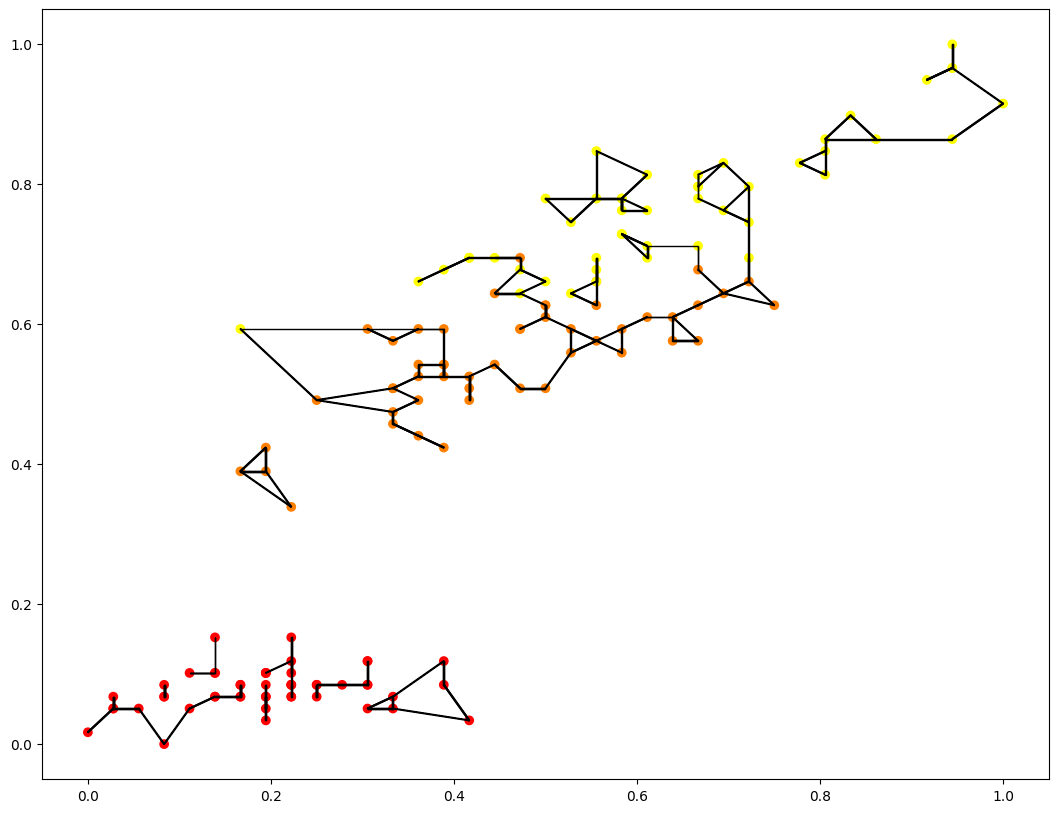

In [ ]:
plt.figure(figsize=(13, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
for i in range(len(X_scaled)):
    neighbors_idx = knn.kneighbors([X_scaled[i]], return_distance=False)[0]
    for j in neighbors_idx:
        plt.arrow(X_scaled[i][0], X_scaled[i][1], X_scaled[j][0] - X_scaled[i][0], X_scaled[j][1] - X_scaled[i][1], head_width=0.001, head_length = 0, color = 'red', fc='k', ec='k')

2. Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


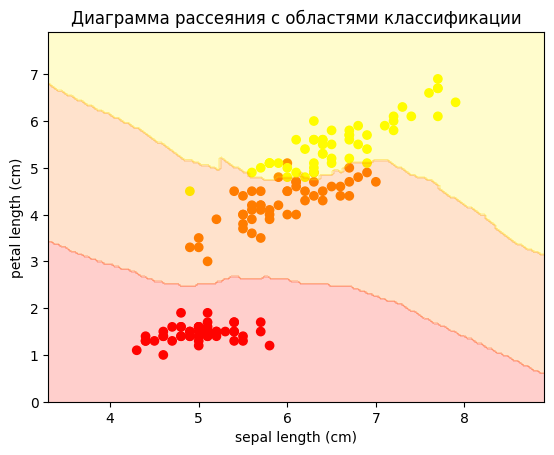

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_scaled, y)

y_pred = knn1.predict(X_scaled)

X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

XX_scaled = scaler.transform(XX)
Z = knn1.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

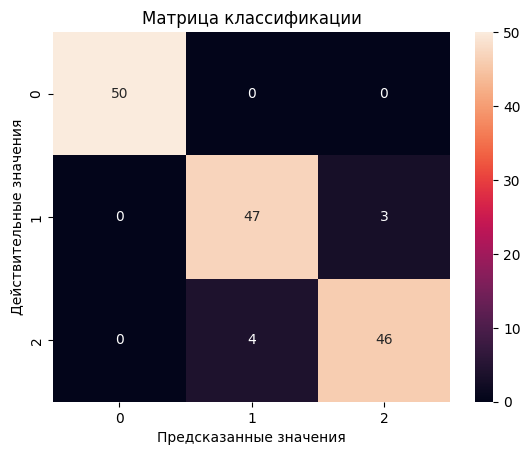

In [ ]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [ ]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        51
           2       0.92      0.94      0.93        49

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



3. Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


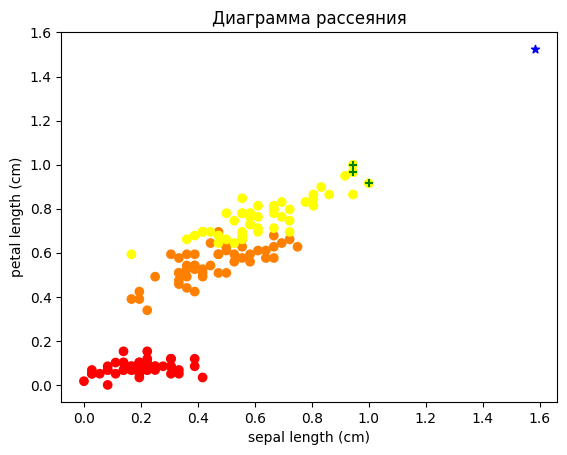

In [ ]:
observation_new = [[10, 10]]
observation_new_scaled = scaler.transform(observation_new)
knn.predict(observation_new_scaled)

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

4. Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.

Евклидово расстояние: [0.82719351 0.84414725 0.84912905]


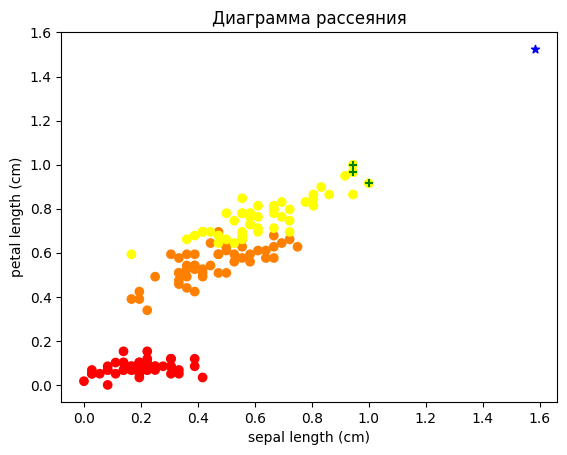

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

distances, indices = knn.kneighbors(observation_new_scaled)


print(f"Евклидово расстояние: {distances[0]}")

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

Манхэтенское расстояние: [1.16431262 1.19350282 1.19821092]


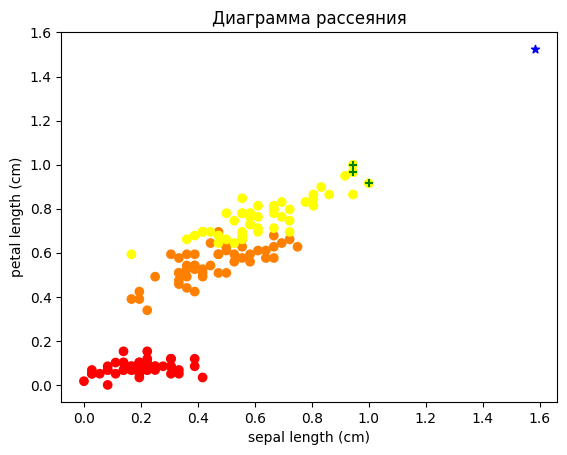

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'manhattan')
knn.fit(X_scaled, y)

distances, indices = knn.kneighbors(observation_new_scaled)

print(f"Манхэтенское расстояние: {distances[0]}")

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

Косинусское расстояние: [2.05425377e-07 2.84354501e-06 9.51806774e-06]


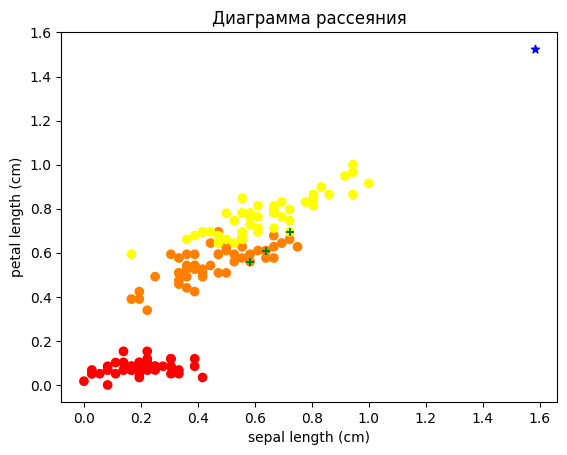

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'cosine')
knn.fit(X_scaled, y)

distances, indices = knn.kneighbors(observation_new_scaled)

print(f"Косинусское расстояние: {distances[0]}")

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

5. Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.

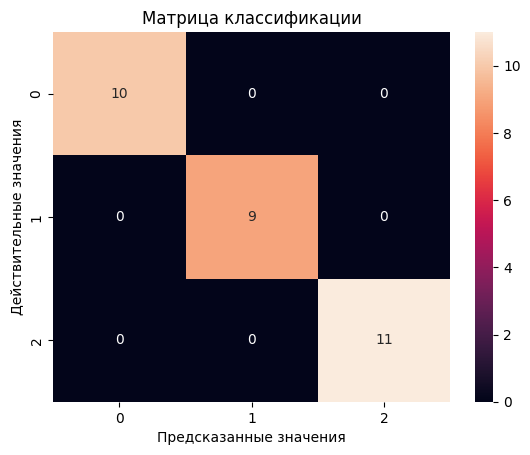

In [ ]:
data_iris = load_iris()
data = data_iris.data
target = data_iris.target

data_sc = scaler.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data_sc, target, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

target_predict = knn.predict(X_test)

plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y_test, target_predict), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

6. Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.

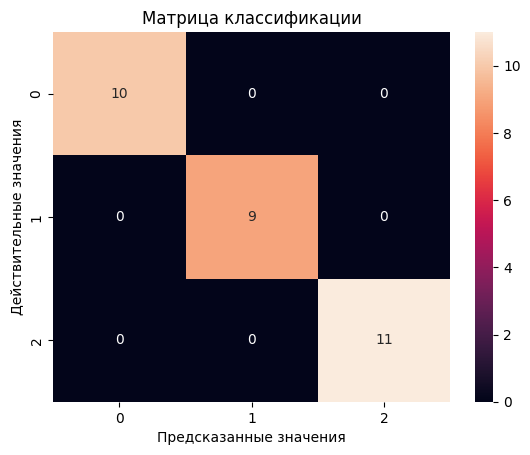

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, weights='distance')
knn.fit(X_train, y_train)
target_predict = knn.predict(X_test)

plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y_test, target_predict), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

7. Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.

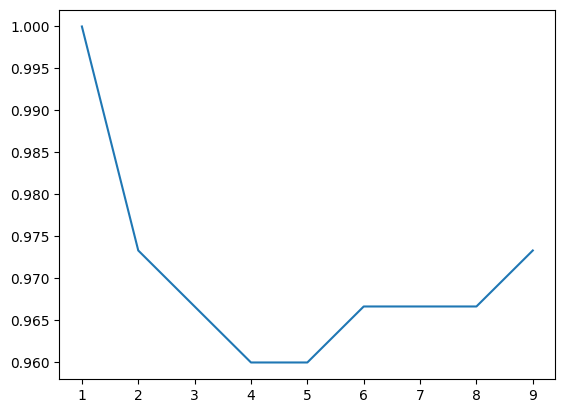

In [ ]:
koefs = [1, 2, 3, 4, 5, 6, 7, 8, 9]
score = []
for i in koefs:
  knn_sic = KNeighborsClassifier(n_neighbors = i)
  knn_sic.fit(data_sc, target)
  tar_pred = knn_sic.predict(data_sc)
  score.append(accuracy_score(target, tar_pred))
plt.plot(koefs, score)

8. Выберите датасет и постройте регрессию при помощи метода ближайших соседей.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Загрузка датасета
boston = fetch_california_housing()
X = boston.data
y = boston.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='distance') # Используем взвешенные веса
knn_regressor.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = knn_regressor.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)